In [1]:
# Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
covid_19_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")

In [3]:
# A look at the dataset
covid_19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
# A concise summary of dataset
covid_19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40805 entries, 0 to 40804
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              40805 non-null  int64  
 1   ObservationDate  40805 non-null  object 
 2   Province/State   22790 non-null  object 
 3   Country/Region   40805 non-null  object 
 4   Last Update      40805 non-null  object 
 5   Confirmed        40805 non-null  float64
 6   Deaths           40805 non-null  float64
 7   Recovered        40805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.5+ MB


### Understanding different features
There are 8 features:
* **SNo:** Serial number
* **ObservationDate:** Date of observation of the cases (format: MM/DD/YYYY)
* **Province/State:** Province or State of the country where cases were observed
* **Country/Region:** Country where cases were observed
* **Last Update:** Time in UTC at which the row is updated for the given province or country. (It is not in a standard format)
* **Confirmed:** Cumulative number of confirmed cases till the date
* **Deaths:** Cumulative number of deats till the date
* **Recovered:** Cumulative number of recovered cases till date

In [5]:
# Set the SNo as index
covid_19_data.set_index('SNo', inplace = True)

In [6]:
# Checking the shape 
covid_19_data.shape

(40805, 7)

Let's rename some of the columns:
* Province/State ==> State
* Country/Region ==> Country
* Last Update ==> Last_Update

In [7]:
# Renaming columns
covid_19_data.rename(columns={'Province/State': 'State', 'Country/Region': 'Country', 'Last Update': 'Last_Update'}, 
                     inplace=True)

In [8]:
# Check the columns
covid_19_data.columns

Index(['ObservationDate', 'State', 'Country', 'Last_Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [9]:
# Converting 'ObservationDate' and 'Last_Update' to datetime
covid_19_data.ObservationDate = pd.DatetimeIndex(covid_19_data.ObservationDate)
covid_19_data.Last_Update = pd.DatetimeIndex(covid_19_data.Last_Update)

In [10]:
# Renaming 'Mainland China' to 'Chine'
covid_19_data.Country = covid_19_data.Country.apply(lambda x: 'China' if x == 'Mainland China' else x)

In [11]:
# List of all the countries infected
countries = covid_19_data.Country.unique()
print(countries)
print()
print('Total number of countries infected: ', len(countries))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia'
 'Pales

Total of 223 countries infected with corana virus.

In [12]:
covid_19_data.Last_Update.quantile(1)

Timestamp('2020-06-13 03:33:14')

In [13]:
# The data was updated last on 13 June 2020.
updated_data = covid_19_data[covid_19_data.Last_Update == covid_19_data.Last_Update.quantile(1)]

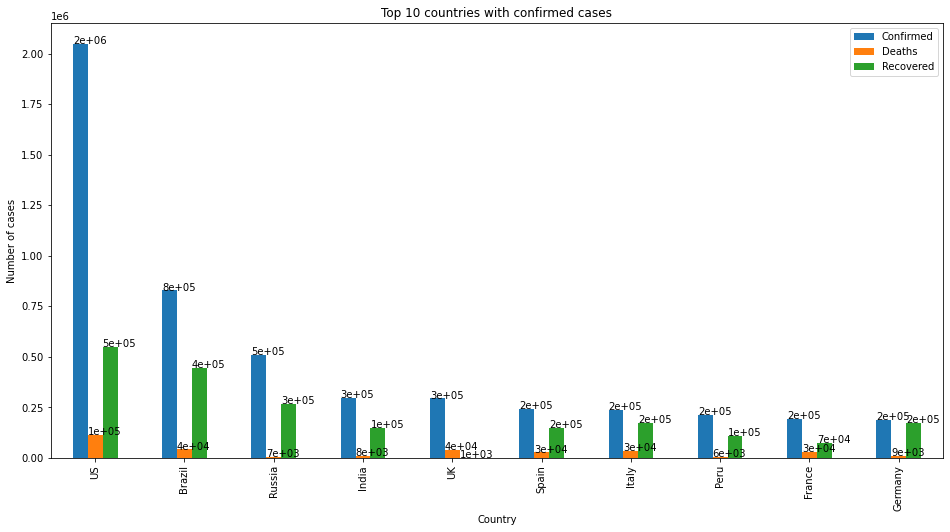

In [14]:
# Visualizing the confirmed, deaths and recovered cases per country for top 10 countries with confirmed cases
fig = updated_data.groupby('Country').sum().sort_values(by = 'Confirmed', ascending = False)[:10].plot(
                                                                                            kind = 'bar',
                                                                                            figsize = (16, 8))

plt.ylabel('Number of cases')
plt.title("Top 10 countries with confirmed cases")

# To diplay the the count on top of the bar
for p in fig.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    fig.annotate('{:.0}'.format(height), (x, y + height + 0.01))

In [15]:
# percentage confirmed cases 
conf_cases = updated_data.groupby('Country')['Confirmed'].sum().sort_values(ascending = False) / updated_data['Confirmed'].sum()

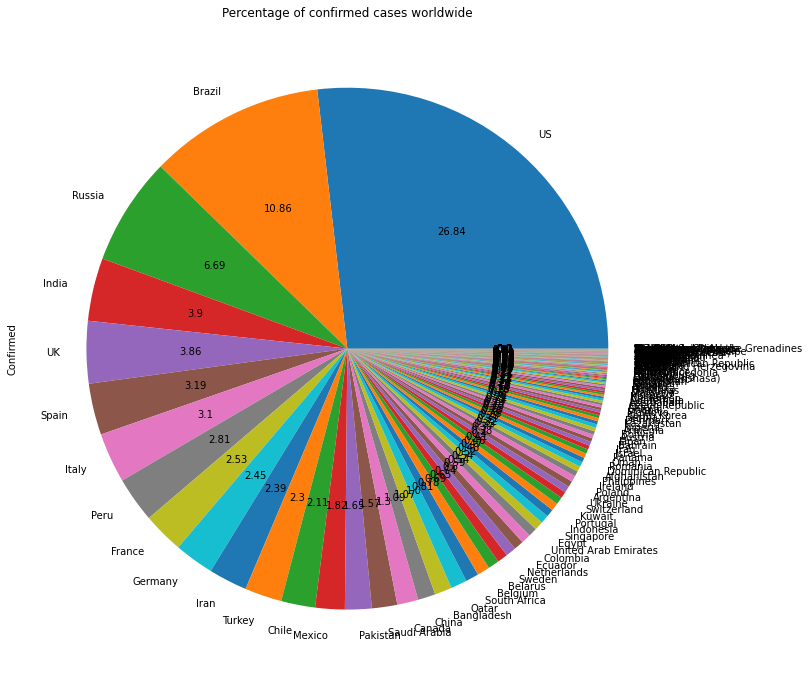

In [16]:
# Plotting the percentage of confirmed cases worldwide
def value(val):
    per = np.round(val , 2)
    return per
conf_cases.plot(kind = 'pie', figsize = (16, 12), autopct = value)
plt.title('Percentage of confirmed cases worldwide')
plt.show()

**USA is leading with 26.8% of confirmed cases worlwide and then Brazil at second position with 10.8% confirmed cases worldwide.**


In [17]:
# Getting top10 countries with highest number of confirmed cases
top_10 = updated_data[['Country', 'Confirmed','Recovered','Deaths']].groupby('Country').sum().sort_values(by = 'Confirmed', ascending = False)[:10]

# Recovery and Deaths percentage
top_10['Recovered_percentage'] = top_10['Recovered'] / top_10['Confirmed'] * 100
top_10['Deaths_percentage'] = top_10['Deaths'] / top_10['Confirmed'] * 100

In [18]:
top_10

,Confirmed,Recovered,Deaths,Recovered_percentage,Deaths_percentage
Country,,,,,
US,2048986.0,547386.0,114669.0,26.714970,5.596378
Brazil,828810.0,445123.0,41828.0,53.706278,5.046754
Russia,510761.0,268862.0,6705.0,52.639493,1.312747
India,297535.0,147195.0,8498.0,49.471491,2.856135
UK,294402.0,1282.0,41566.0,0.435459,14.118790
Spain,243209.0,150376.0,27136.0,61.829949,11.157482
Italy,236305.0,173085.0,34223.0,73.246440,14.482554
Peru,214788.0,107133.0,6088.0,49.878485,2.834423
France,193220.0,72695.0,29377.0,37.622917,15.203913


In [19]:
top_10.Recovered_percentage.sort_values(ascending = False)

Country
Germany    91.619220
Italy      73.246440
Spain      61.829949
Brazil     53.706278
Russia     52.639493
Peru       49.878485
India      49.471491
France     37.622917
US         26.714970
UK          0.435459
Name: Recovered_percentage, dtype: float64

* Germany is leading in the recovery percentage of confirmed corona cases.
* The situation in UK is very poor with only 0.43 percentage of recovered corona cases

In [20]:
top_10.Deaths_percentage.sort_values(ascending=False)

Country
France     15.203913
Italy      14.482554
UK         14.118790
Spain      11.157482
US          5.596378
Brazil      5.046754
Germany     4.691122
India       2.856135
Peru        2.834423
Russia      1.312747
Name: Deaths_percentage, dtype: float64

* Russia is at 3rd postion in terms of confirmed cases and at 5th position in terms of recovered percentage, however, the death percentage in Russia is very low i.e. only 1.3% which is a very good sign.
* However, India is in top 5 in terms of confirmed cases and at 6th position in terms of rocovered percentage, the death percentage in india seems to be low (i.e. 2.8%) as compared to other countries.
* UK has more deaths than recovered cases. This shows a very poor condition in UK.

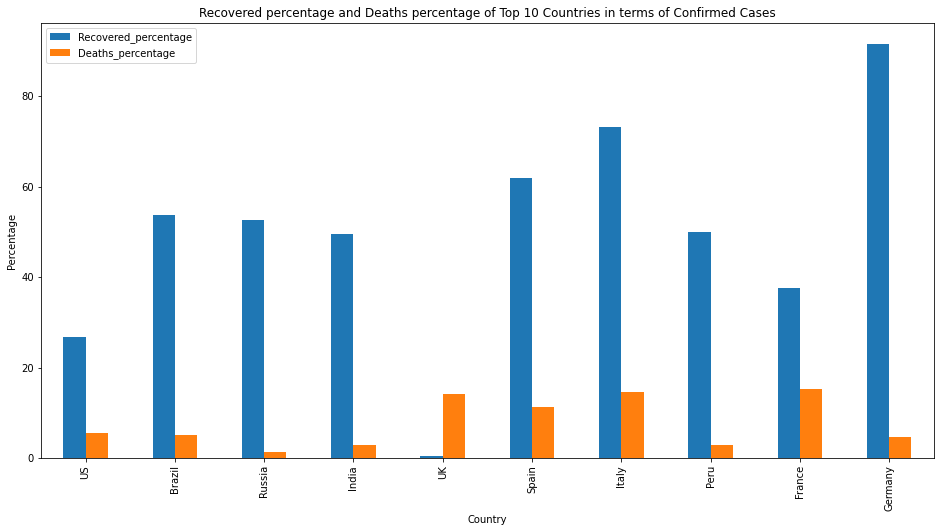

In [21]:
top_10[['Recovered_percentage','Deaths_percentage']].plot(kind = 'bar', figsize = (16, 8))
plt.title("Recovered percentage and Deaths percentage of Top 10 Countries in terms of Confirmed Cases")
plt.ylabel("Percentage")
plt.show()

## USA With Highest Confirmed Cases Worldwide

In [22]:
# USA data
USA_data = updated_data[updated_data.Country == 'US']
USA_data_by_state = USA_data[['State', 'Confirmed', 'Recovered', 'Deaths']].groupby('State').sum().sort_values(
                                                                                by = 'Confirmed',
                                                                                ascending = False)

USA_day_wise = covid_19_data[covid_19_data.Country == 'US'][['ObservationDate', 'Confirmed', 'Recovered', 'Deaths']].groupby('ObservationDate').sum().sort_values(
                                                                                by = 'ObservationDate',
                                                                                ascending = True)

In [23]:
USA_total_recovered = USA_data_by_state.loc['Recovered']
USA_data_by_state = USA_data_by_state.drop('Recovered', axis = 0)

In [24]:
USA_total_recovered

Confirmed         0.0
Recovered    547386.0
Deaths            0.0
Name: Recovered, dtype: float64

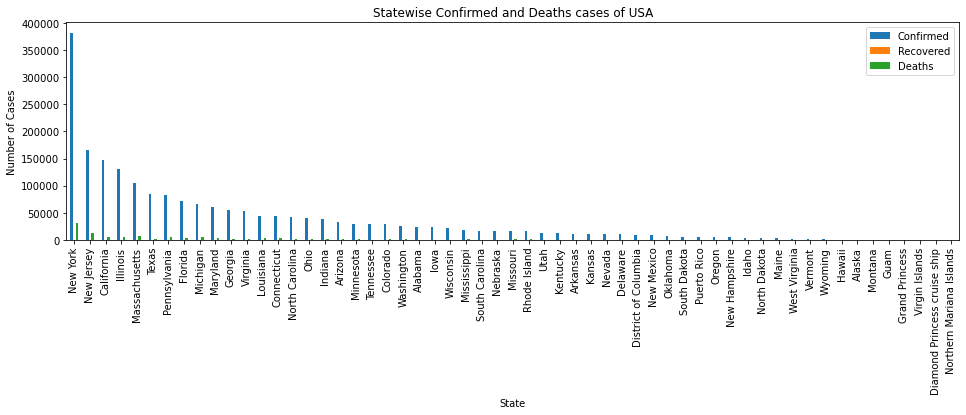

In [25]:
# For USA overall recovered is given. Statewise recovered cases are not given in the dataset.
USA_data_by_state.plot(kind = 'bar', figsize = (16, 4))
plt.title("Statewise Confirmed and Deaths cases of USA")
plt.ylabel('Number of Cases')
plt.show()

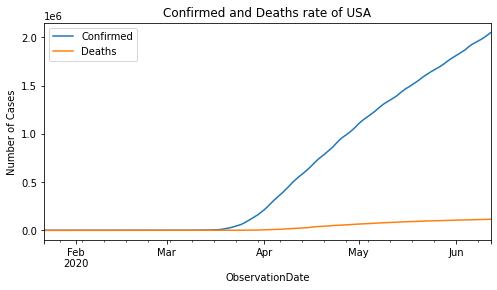

In [26]:
USA_day_wise[['Confirmed', 'Deaths']].plot(figsize = (8,4))
plt.title('Confirmed and Deaths rate of USA')
plt.ylabel('Number of Cases')
plt.show()

* Confirmed cases in USA is increasing with high slope and this needs to be flatened.

## Germany With Highest Recovery Percentage

In [27]:
# Germany data
Germany_data = updated_data[updated_data.Country == 'Germany']
Germany_data_by_state = Germany_data[['State', 'Confirmed', 'Recovered', 'Deaths']].groupby('State').sum().sort_values(
                                                                                by = 'Confirmed',
                                                                                ascending = False)

Germany_day_wise = covid_19_data[covid_19_data.Country == 'Germany'][['ObservationDate', 'Confirmed', 'Recovered', 'Deaths']].groupby('ObservationDate').sum().sort_values(
                                                                                by = 'ObservationDate',
                                                                                ascending = True)

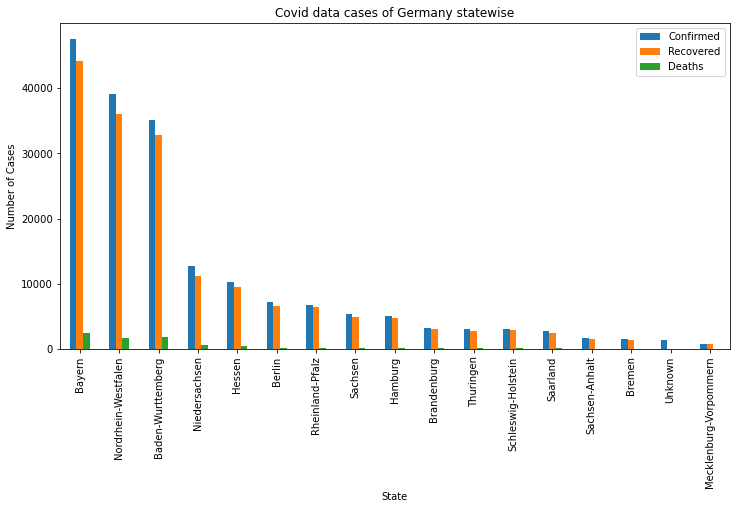

In [28]:
Germany_data_by_state.plot(kind = 'bar', figsize = (12,6))
plt.title("Covid data cases of Germany statewise")
plt.ylabel('Number of Cases')
plt.show()

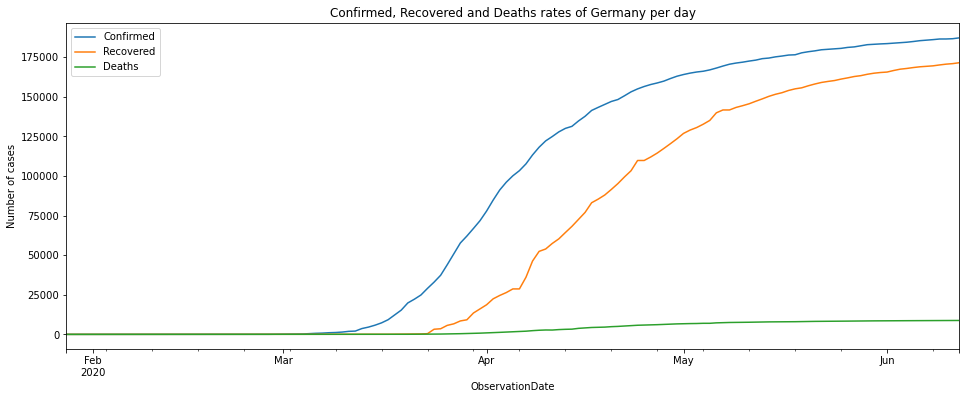

In [29]:
Germany_day_wise.plot(figsize = (16,6))
plt.title("Confirmed, Recovered and Deaths rates of Germany per day")
plt.ylabel("Number of cases")
plt.show()

* It seems like the Confirmed case rate will be soon constant for Germany.

## Russia With Lowest Deaths Percentage Among 10 Countries

In [30]:
Russia_data = updated_data[updated_data.Country == 'Russia']
Russia_data_by_state = Russia_data[['State', 'Confirmed', 'Recovered', 'Deaths']].groupby('State').sum().sort_values(
                                                                                by = 'Confirmed',
                                                                                ascending = False)

Russia_day_wise = covid_19_data[covid_19_data.Country == 'Russia'][['ObservationDate', 'Confirmed', 'Recovered', 'Deaths']].groupby('ObservationDate').sum().sort_values(
                                                                                by = 'ObservationDate',
                                                                                ascending = True)

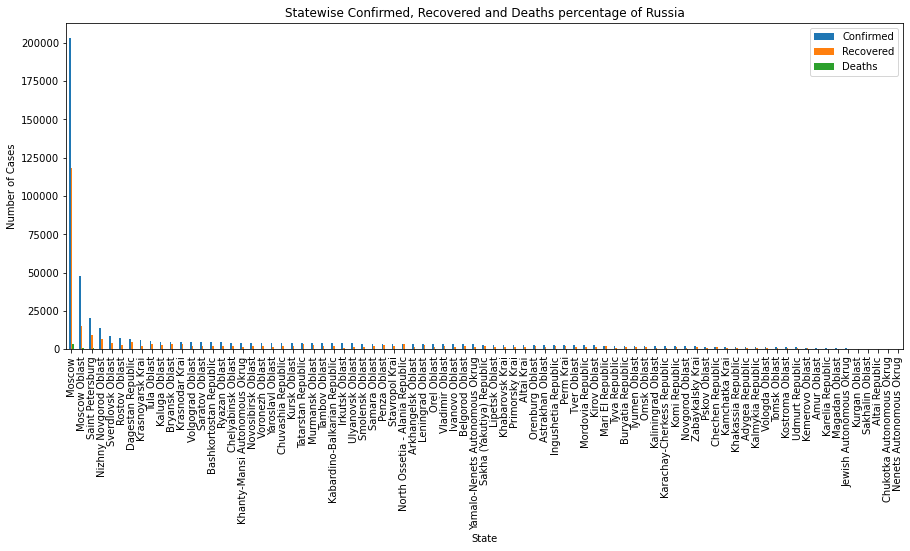

In [31]:
Russia_data_by_state.plot(kind = 'bar', figsize = (15,6))
plt.title("Statewise Confirmed, Recovered and Deaths percentage of Russia")
plt.ylabel("Number of Cases")
plt.show()

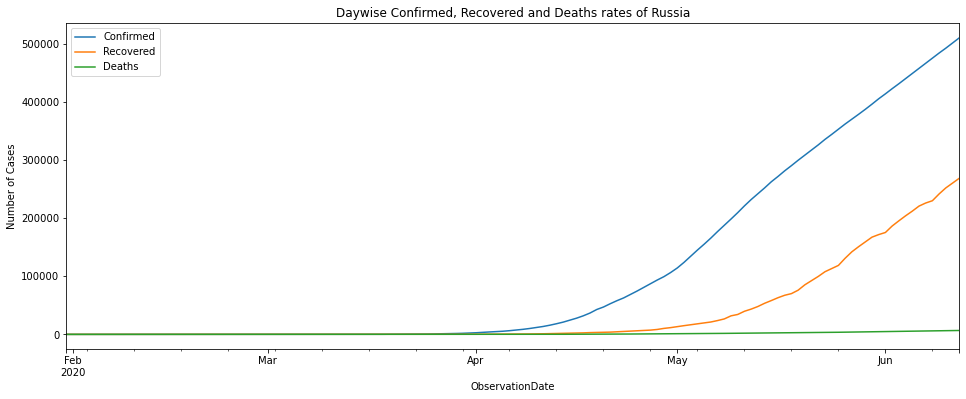

In [32]:
Russia_day_wise.plot(figsize = (16, 6))
plt.title("Daywise Confirmed, Recovered and Deaths rates of Russia")
plt.ylabel('Number of Cases')
plt.show()

* The death rate curve for Russia seems to be nearly constant to 0.

## India With Third Lowest Deaths Percentage Among 10 Countries

In [33]:
India_data = updated_data[updated_data.Country == 'India']
India_data_by_state = India_data[['State', 'Confirmed', 'Recovered', 'Deaths']].groupby('State').sum().sort_values(
                                                                                by = 'Confirmed',
                                                                                ascending = False)

India_day_wise = covid_19_data[covid_19_data.Country == 'India'][['ObservationDate', 'Confirmed', 'Recovered', 'Deaths']].groupby('ObservationDate').sum().sort_values(
                                                                                by = 'ObservationDate',
                                                                                ascending = True)

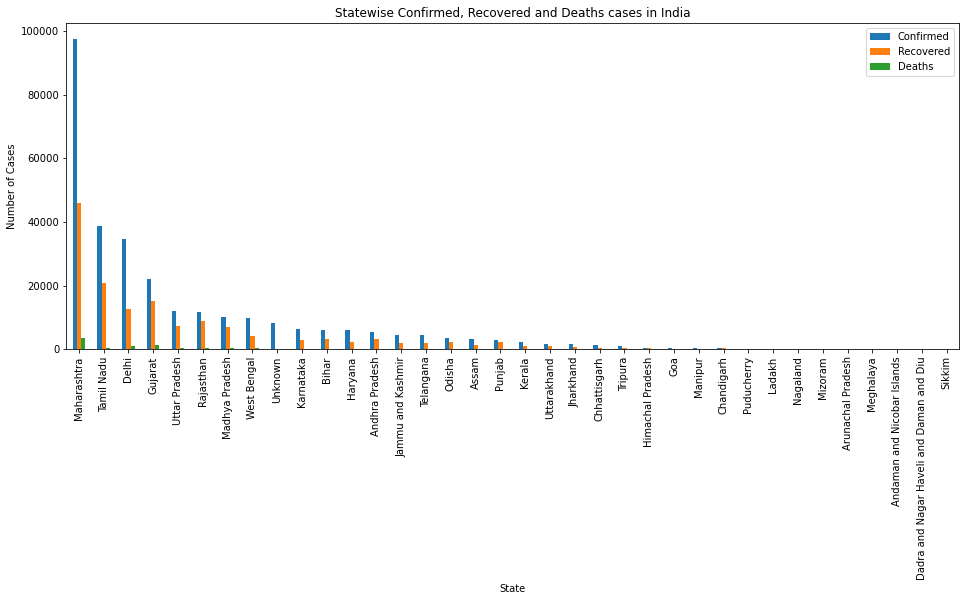

In [34]:
India_data_by_state.plot(kind = 'bar', figsize = (16, 6))
plt.title("Statewise Confirmed, Recovered and Deaths cases in India")
plt.ylabel("Number of Cases")
plt.show()

* 50% cases in Maharashtra seems to be recovered.

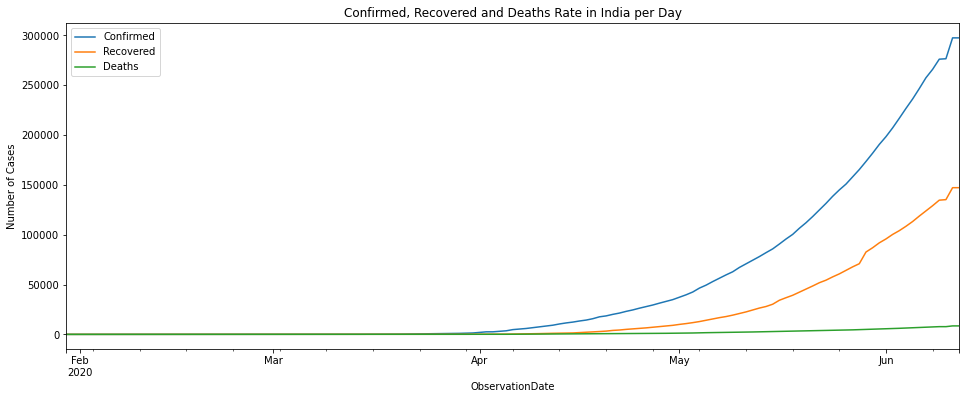

In [35]:
India_day_wise.plot(figsize = (16, 6))
plt.title("Confirmed, Recovered and Deaths Rate in India per Day")
plt.ylabel("Number of Cases")
plt.show()

## Questions

1. With the help of these data, can we predict on a given date what number of confirmed, recovered or deaths cases will a country have? 

2. As one can observe that the confirmed rate and recovery rate for Germany is going parallel, can we say that Germany will be the first country to be freed from corona virus among those ten countries listed in top_10 dataframe?